In [116]:
import matplotlib.pyplot as plt
import numpy as np 
def spectroscopic_calculation_from_calibration_curve(interval=[], absorbance=[], title='Calibration curve.'):
    """
    Takes concentrations and absorbances values calculates clalibration curve.
    """
    fig = plt.figure(figsize=(10,6))
    axis = fig.add_subplot(111)

    z = np.polyfit(interval,absorbance, 1)
    p = np.poly1d(z)
    axis.plot(interval,absorbance)
    axis.plot(
        interval, 
        p(interval), 
        #color="red", 
        linestyle='dashed',
        linewidth=2,
        # marker='o',
        markerfacecolor='blue',
        markersize=3,
    )
    axis.grid()
    axis.set_title(title)
    axis.set_xlabel('Concentration(mcg/ml)')
    axis.set_ylabel('Absorbance')
    plt.show()
    print "Calibration curve(y = mx + c):\n{}".format(p)
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(interval,absorbance)
    print "r-squared:", r_value**2
    %matplotlib inline 
    return p

def concentration_values_for_sample(linear_equation=None, sample_absorbance=[]):
    conc_values = (sample_absorbance - linear_equation[0])/linear_equation[1]
    # print "Concentration values : {}".format(conc_values)
    print
    return conc_values

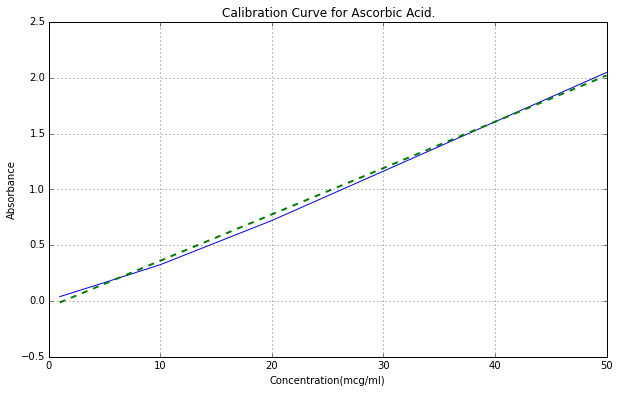

Calibration curve(y = mx + c):
 
0.04151 x - 0.05438
r-squared: 0.997069332026
Concentration values : 
[ 2.70727195  4.1526903   1.59911787  7.47715252]


In [117]:
interval = [1, 5, 10, 20, 50]
absorbance = [0.039, 0.165, 0.325, 0.721, 2.048]
p = spectroscopic_calculation_from_calibration_curve(
    interval=interval, 
    absorbance=absorbance, 
    title="Calibration Curve for Ascorbic Acid."
)

sample_absorbance = np.array([0.058, 0.118, 0.012, 0.256])
print "Concentration values : ", concentration_values_for_sample(
    linear_equation=p,
    sample_absorbance=sample_absorbance
)

In [120]:
new_absorbance = np.array([0.420, 0.131, 0.430, 0.403, 0.368, 0.325, 0.497, 0.453, 0.455, 0.453])
print concentration_values_for_sample(
    linear_equation=p,
    sample_absorbance=new_absorbance
)


[ 11.4279627    4.46586428  11.66886576  11.0184275   10.17526679
   9.13938363  13.28291625  12.22294279  12.2711234   12.22294279]


In [121]:
new_absorbance = np.array([0.072, 0.426, 0.415, 0.393, 0.109, 0.075, 0.422, 0.008, 0.110, 0.351])
print concentration_values_for_sample(
    linear_equation=p,
    sample_absorbance=new_absorbance
)


[  3.04453623  11.57250453  11.30751117  10.77752444   3.93587755
   3.11680715  11.47614331   1.50275665   3.95996785   9.76573159]


In [122]:
new_absorbance = np.array([0.376, 0.117, 0.363, 0.123, 0.135, 0.277, 0.103, 0.270, 0.246, 0.173])
print concentration_values_for_sample(
    linear_equation=p,
    sample_absorbance=new_absorbance
)


[ 10.36798924   4.1286      10.05481526   4.27314183   4.5622255
   7.98304895   3.79133571   7.81441681   7.23624946   5.47765713]


In [123]:
new_absorbance = np.array([0.244, 0.285, 0.261, 0.102, 0.258, 0.100, 0.081, 0.221, 0.188, 0.063])
print concentration_values_for_sample(
    linear_equation=p,
    sample_absorbance=new_absorbance
)


[ 7.18806885  8.17577139  7.59760405  3.76724541  7.52533313  3.7190648
  3.26134898  6.63399181  5.83901172  2.82772348]


In [181]:
array_of_array =  np.array([
        [0.072, 0.426, 0.415, 0.393, 0.109, 0.075, 0.422, 0.008, 0.110, 0.351],
        [0.376, 0.117, 0.363, 0.123, 0.135, 0.277, 0.103, 0.270, 0.246, 0.173],
        [0.420, 0.131, 0.430, 0.403, 0.368, 0.325, 0.497, 0.453, 0.455, 0.453],
        [0.244, 0.285, 0.261, 0.102, 0.258, 0.100, 0.081, 0.221, 0.188, 0.063],
    ])
new_array_of_array = []
print array_of_array
for new_absorbance in array_of_array:
    print '--------------'
    new_array_of_array.append(new_absorbance)
    print "Processing:\n", new_absorbance
    _conc = concentration_values_for_sample(linear_equation=p, sample_absorbance=new_absorbance)
    print "Results:\n ", _conc
    new_array_of_array.append(_conc)
    new_array_of_array
    print '--------------'

print "Final:\n", new_array_of_array
final_solution = np.array(new_array_of_array)
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
print "/Users/prashant/work/pypharm/Ascorbic_Acid_Tablet_Results:\n", np.swapaxes(final_solution, 0, 1)
np.set_printoptions(suppress=True)
np.swapaxes(final_solution, 0, 1).to_file("/Users/prashant/work/pypharm/Ascorbic_Acid_Tablet_Results.csv",
           delimiter=",",
           format='%10.3f'
          )

[[ 0.072  0.426  0.415  0.393  0.109  0.075  0.422  0.008  0.11   0.351]
 [ 0.376  0.117  0.363  0.123  0.135  0.277  0.103  0.27   0.246  0.173]
 [ 0.42   0.131  0.43   0.403  0.368  0.325  0.497  0.453  0.455  0.453]
 [ 0.244  0.285  0.261  0.102  0.258  0.1    0.081  0.221  0.188  0.063]]
--------------
Processing:
[ 0.072  0.426  0.415  0.393  0.109  0.075  0.422  0.008  0.11   0.351]

Results:
  [  3.045  11.573  11.308  10.778   3.936   3.117  11.476   1.503   3.96
   9.766]
--------------
--------------
Processing:
[ 0.376  0.117  0.363  0.123  0.135  0.277  0.103  0.27   0.246  0.173]

Results:
  [ 10.368   4.129  10.055   4.273   4.562   7.983   3.791   7.814   7.236
   5.478]
--------------
--------------
Processing:
[ 0.42   0.131  0.43   0.403  0.368  0.325  0.497  0.453  0.455  0.453]

Results:
  [ 11.428   4.466  11.669  11.018  10.175   9.139  13.283  12.223  12.271
  12.223]
--------------
--------------
Processing:
[ 0.244  0.285  0.261  0.102  0.258  0.1    0.081  0.2

AttributeError: 'numpy.ndarray' object has no attribute 'to_file'

In [193]:
a = np.asarray(np.swapaxes(final_solution, 0, 1))
np.savetxt('/Users/prashant/work/pypharm/Ascorbic_Acid_Tablet_Results.csv',
            np.swapaxes(final_solution, 0, 1),
            delimiter=",",
            fmt='%10.3f')

In [189]:

print np.swapaxes(final_solution, 0, 1)

[[  0.072   3.045   0.376  10.368   0.42   11.428   0.244   7.188]
 [  0.426  11.573   0.117   4.129   0.131   4.466   0.285   8.176]
 [  0.415  11.308   0.363  10.055   0.43   11.669   0.261   7.598]
 [  0.393  10.778   0.123   4.273   0.403  11.018   0.102   3.767]
 [  0.109   3.936   0.135   4.562   0.368  10.175   0.258   7.525]
 [  0.075   3.117   0.277   7.983   0.325   9.139   0.1     3.719]
 [  0.422  11.476   0.103   3.791   0.497  13.283   0.081   3.261]
 [  0.008   1.503   0.27    7.814   0.453  12.223   0.221   6.634]
 [  0.11    3.96    0.246   7.236   0.455  12.271   0.188   5.839]
 [  0.351   9.766   0.173   5.478   0.453  12.223   0.063   2.828]]
